In [1]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
%matplotlib inline

Re, Rm, Pm, omega0, q, B0, pi, Q, beta, c1, c2, u0, du0, k, xi, delta = symbols("R_e R_m P_m Omega_0 q B_0 pi Q beta c_1 c_2 u_0 du_0 k xi delta", real=True)
dt, dr, dz = symbols("d_t d_r d_z")
r, z, t  = symbols("r, z, t", real=True)
sigma = symbols("sigma", real=True)

psi = Function('psi')(t,r,z)
u = Function('u')(t,r,z)
A = Function('A')(t,r,z)
B = Function('B')(t,r,z)

psi21 = Function('psi_21')(t,r,z)
u21 = Function('u_21')(t,r,z)
A21 = Function('A_21')(t,r,z)
B21 = Function('B_21')(t,r,z)

psi11 = Function('psi_11')(t,r,z)
u11 = Function('u_11')(t,r,z)
A11 = Function('A_11')(t,r,z)
B11 = Function('B_11')(t,r,z)

#State vector matrix
V = Matrix([psi, u, A, B])

V21 = Matrix([psi21, u21, A21, B21])
V11 = Matrix([psi11, u11, A11, B11])

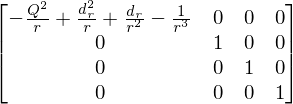

In [4]:
D_adj = Matrix([[(1/r)*dr**2 - (1/r)*Q**2 - (1/r**3) + (1/r**2)*dr, 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])
D_adj

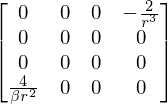

In [6]:
H_adj = Matrix([[0, 0, 0, -(2/r**3)],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [(2/beta)*(2/r**2), 0, 0, 0]])
H_adj

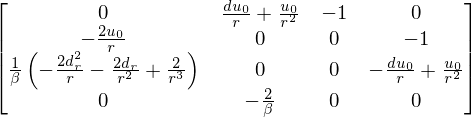

In [8]:
L1_adj = Matrix([[0, (1/r**2)*u0 + (1/r)*du0, -1, 0],
             [-(2/r)*u0, 0, 0, -1],
             [(2/beta)*((1/r**3) - (1/r**2)*dr - (1/r)*dr**2), 0, 0, (1/r**2)*u0 - (1/r)*du0],
             [0, -(2/beta), 0, 0]])
L1_adj

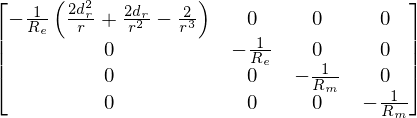

In [36]:
L2_adj = Matrix([[(-1/Re)*(-2/r**3 + (2/r**2)*dr + (2/r)*dr**2), 0, 0, 0],
             [0, -1/Re, 0, 0],
             [0, 0, -1/Rm, 0],
             [0, 0, 0, -1/Rm]])
L2_adj

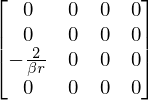

In [37]:
L3_adj = Matrix([[0, 0, 0, 0],
             [0, 0, 0, 0],
             [-(2/beta)*(1/r), 0, 0, 0],
             [0, 0, 0, 0]])
L3_adj

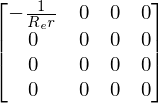

In [38]:
L4_adj = Matrix([[-(1/Re)*(1/r), 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])
L4_adj

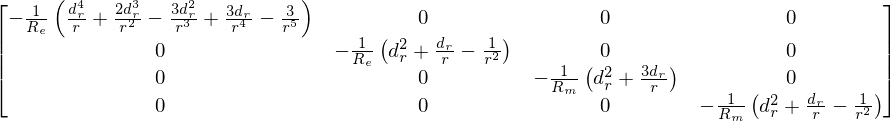

In [39]:
L0_adj = Matrix([[-(1/Re)*((-3/r**5) + (3/r**4)*dr - (3/r**3)*dr**2 + (2/r**2)*dr**3 + (1/r)*dr**4), 0, 0, 0],
             [0, -(1/Re)*((1/r)*dr + dr**2 - (1/r**2)), 0, 0],
             [0, 0, -(1/Rm)*((3/r)*dr + dr**2), 0],
             [0, 0, 0, -(1/Rm)*((1/r)*dr + dr**2 - (1/r**2))]])
L0_adj

In [40]:
Ladj = L0_adj + -1j*Q*L1_adj - Q**2*L2_adj + 1j*Q**3*L3_adj + Q**4*L4_adj

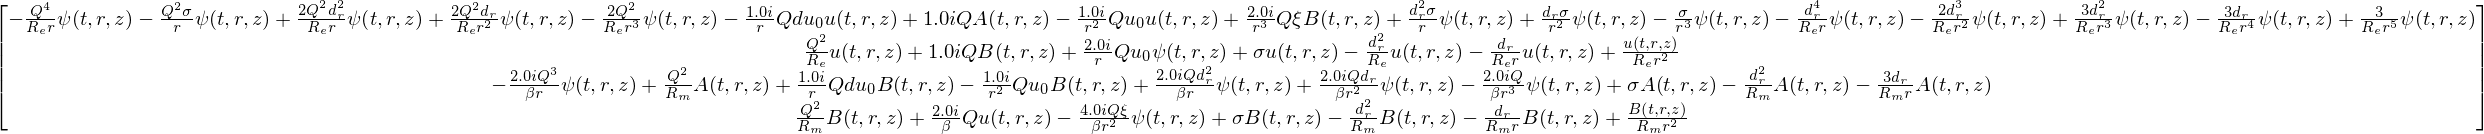

In [43]:
newadjoint = ((sigma*D_adj + Ladj - 1j*Q*xi*H_adj)*V).expand()
newadjoint

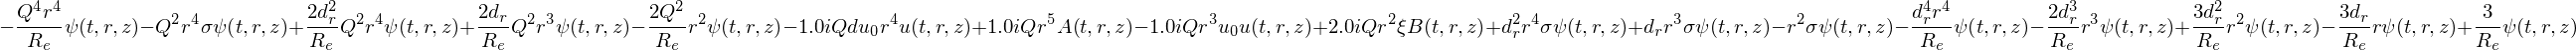

In [44]:
(newadjoint[0]*r**5).expand()

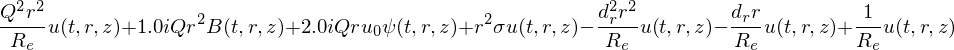

In [45]:
(newadjoint[1]*r**2).expand()

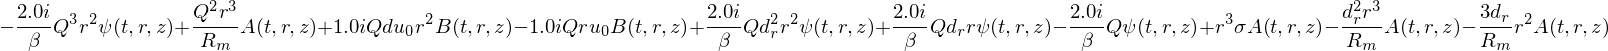

In [46]:
(newadjoint[2]*r**3).expand()

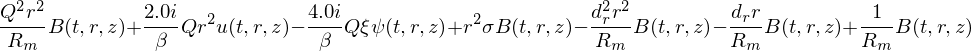

In [47]:
(newadjoint[3]*r**2).expand()